### Hydrogen demand calculation
Following script is used to calculate hydrogen demand per each industrial subsector.

In [1]:
import pandas as pd
# import industrial consumption
steel_df = pd.read_csv('/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/Data/Metallerzeugung WZ08 24.1.csv')
# Methanol = pd.read_csv('/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/input/2016/electrolyzers.csv')
# Ammonia = pd.read_csv('/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/output/2016/Elec_capacities/Elec_x_optimizedBidAmount.csv')
# Refineries = pd.read_csv('/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/output/2016/EOM_Prices.csv')

#initialize export csv
industrial_H2demand = pd.DataFrame() 



### Hydrogen SEC values for industrial sector/processes
Following values are specific energy values for required hydrogen per each unit of produced product.
Refinery used different SEC H2 for different processes: 
- Refinery - Hydrocracking = 27 (kgH2/t)
- Refinery - Catalytic Cracking = 7.2 (kgH2/t)
- Refinery - Hydration of Cokers = 4.5 (kgH2/t)
- Total = 38.7 (kgH2/t) = 38.7 * 0.03333 = 1.29 #MWh/t


In [2]:
#Specific energy consumption per each industrial sector. Values are in MWh/t
SEC_H2_Iron_steel = 1.89 #MWh/t
SEC_H2_Olefins = 17.67 #MWh/t
SEC_H2_Methanol = 6.31 #MWh/t
SEC_H2_Ammonia = 5.92 #MWh/t
#data from : Neuwirth, M., Fleiter, T., Manz, P., & Hofmann, R. (2022). The future potential hydrogen demand in energy-intensive industries
SEC_H2_Refineries =  1.29 #MWh/t
#(from: Omar Abdelrahman. (n.d.). Spatial Disaggregation of Future Hydrogen Demand for the Industrial and Transport Sectors in Europe Chair of Renewable and Sustainable Energy Systems.)
#lower heating value of H2
energyContentH2_LHV = 0.03333 #MWh/kg

### Calculate H2 demand for iron and steel industry: 

In [3]:
#projected % of hydrogen process implementation in 2030
projected_implementation = 1 
#Germany's steel production in 2020
steel_prod_2020 = 35679000 #ton

#extract process related consumption
process_demand = steel_df['Prozesswärme'] +steel_df['Prozesskälte']+steel_df['Mechanische Antriebe']
#convert power values to energy 
steel_energy_demand = process_demand * 0.25 #kWh because of 15 min interval
#calculate total energy demand
steel_energy_demand_tot = sum(steel_energy_demand)
#calculate normalized demand column
steel_energy_demand_norm = steel_energy_demand/steel_energy_demand_tot #normalized energy demand total =1

#Please specify forecasted production for desired year
forecasted_production = 35679000 #ton

#construct production profile
prod_profile_steel = steel_energy_demand_norm * forecasted_production #ton

#calculate H2 demand in MWh
steel_H2_demand_MWh = prod_profile_steel * SEC_H2_Iron_steel * projected_implementation #MWh of H2
#convert to kg of H2
steel_H2_demand_kg = steel_H2_demand_MWh / energyContentH2_LHV #kg of H2

# Add the steel_H2_demand_kg column to the new dataframe
industrial_H2demand['Iron_steel'] = round(steel_H2_demand_kg, 2)
total_demand_MWh = sum(steel_H2_demand_MWh/10e5)
total_demand_kg = sum(steel_H2_demand_kg/10e8)

print(total_demand_MWh, 'TWh')
print(total_demand_kg, 'Mln. ton')


67.4333099999995 TWh
2.0232016201620198 Mln. ton


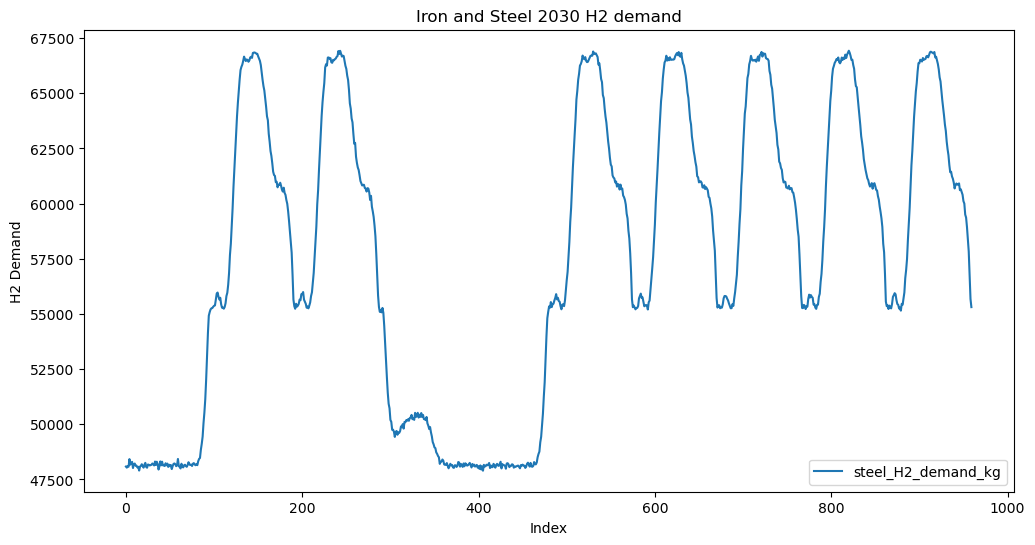

In [7]:
import matplotlib.pyplot as plt

steel_H2_demand_kg_toplot = steel_H2_demand_kg[0:960]
# Line plot for EOM_prices_w_opt
plt.plot(steel_H2_demand_kg_toplot, label='steel_H2_demand_kg')

plt.xlabel('Index')
plt.ylabel('H2 Demand')
plt.title('Iron and Steel 2030 H2 demand')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()



In [4]:
# Export the new dataframe to a CSV file
#make sure demand columns match with electrolyzer names (i.e. industry name)
industrial_H2demand.to_csv('/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/Data/industrial_demand.csv', index=True)


In [ ]:
#statistics of generated demand values

def create_statistics(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Calculate statistics
    statistics = {
        'Total Rows': len(df),
        'Total Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().to_dict(),
        'Data Types': df.dtypes.to_dict(),
        'Summary Statistics': df.describe().to_dict()
    }
    
    # Generate graphs
    for column in df.columns[1:]:  
        if df[column].dtype in ['int64', 'float64']:
            df[column].plot(kind='hist', title=column, alpha=0.75)
            plt.axvline(df[column].quantile(0.25), color='r', linestyle='--', label='25th Percentile')
            plt.axvline(df[column].quantile(0.5), color='g', linestyle='--', label='50th Percentile')
            plt.axvline(df[column].quantile(0.75), color='b', linestyle='--', label='75th Percentile')
            plt.xlabel('Power consumption MW')  # Add x-axis label
            plt.legend()
            plt.show()
        elif df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            value_counts.plot(kind='bar', title=column)
            plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
            plt.xlabel('Power consumption MW')
            plt.show()
    
    return statistics